In [122]:
import kagglehub
import shutil
import os

from tensorflow.python.ops.ragged.ragged_conversion_ops import to_tensor

# 최신 버전 다운로드
path = kagglehub.dataset_download(handle="stealthtechnologies/predict-student-performance-dataset")
os.makedirs('./dataset', exist_ok=True)

# 파일들을 원하는 위치로 복사
for file in os.listdir(path):
    src = os.path.join(path, file)
    dst = os.path.join('./dataset', file)
    shutil.copy2(src, dst)

In [123]:
import warnings as wr
wr.filterwarnings('ignore')

In [124]:
import pandas as pd

In [125]:
csv_data = pd.read_csv('./dataset/data.csv')
print(csv_data.head())

print("=="*30)

# null, nan 있는지 확인
print(csv_data.isnull().sum())

   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0              0.95822          3.4          8.2            53.0    47.0
1              0.85566          3.2          5.9            55.0    35.0
2              0.68025          3.2          9.3            41.0    32.0
3              0.25936          3.2          8.2            47.0    34.0
4              0.60447          3.8         10.0            75.0    33.0
Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

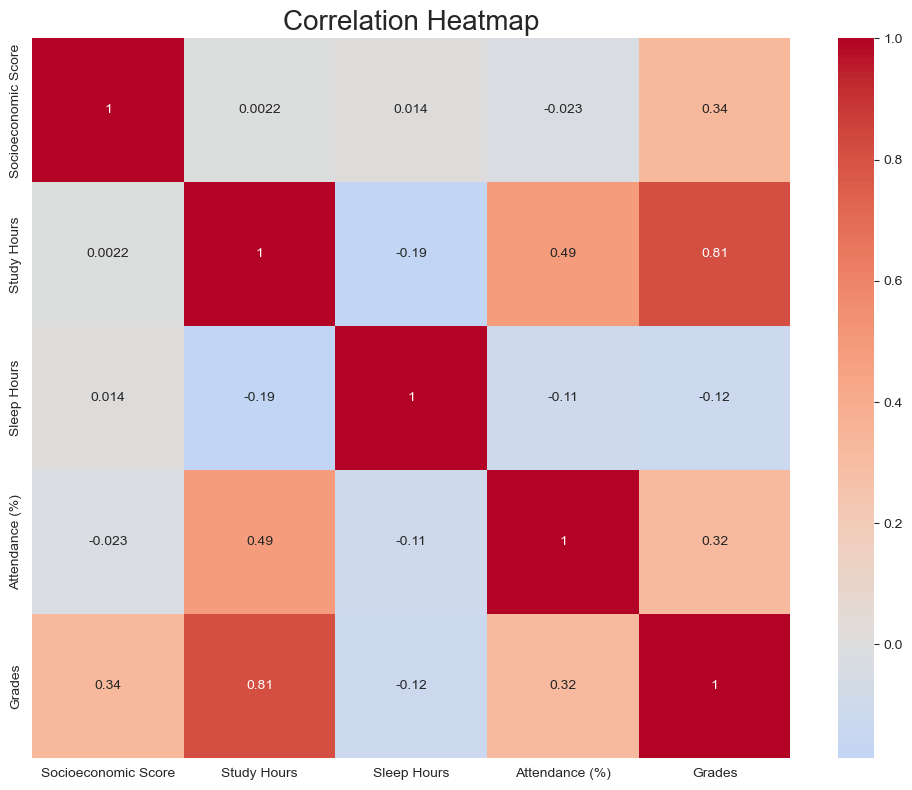

In [127]:
"""
상관관계 히트맵

1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계, 0에 가까울수록 상관관계가 없다
"""

plt.figure(figsize=(10, 8))
sns.heatmap(csv_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

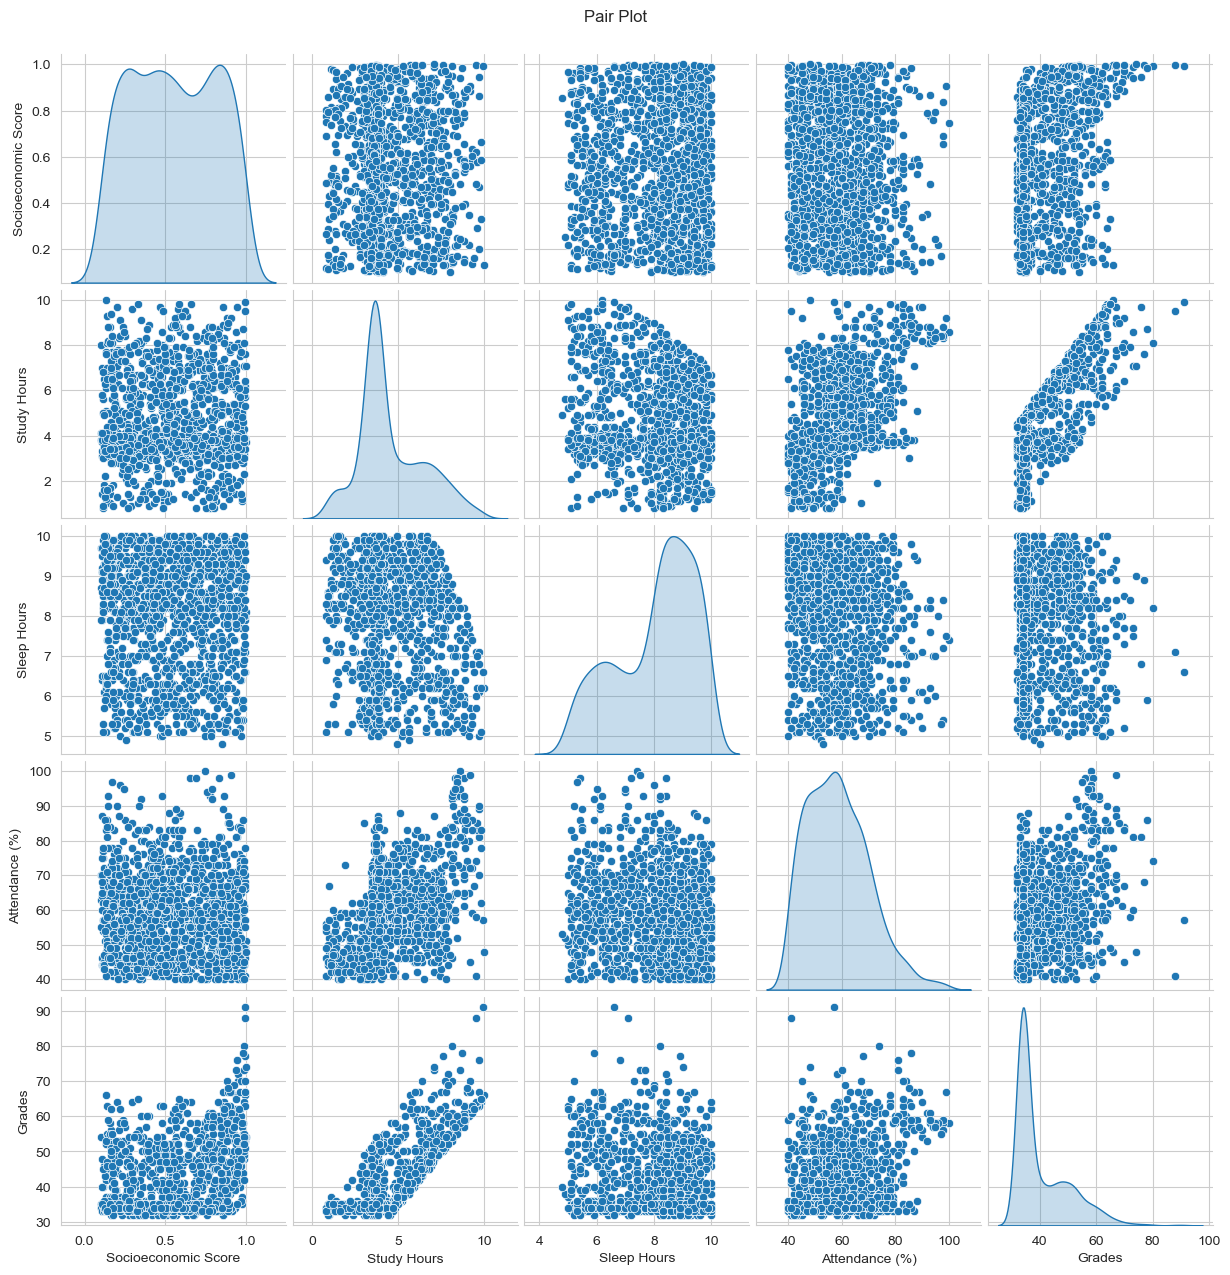

In [128]:
sns.set_style("whitegrid")
sns.pairplot(csv_data, diag_kind='kde')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [129]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [130]:
x = csv_data[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = csv_data['Grades']

scaler = StandardScaler()
x = scaler.fit_transform(x)

# 학습, 검증용 데이터 분리, 타입 정의
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=456)
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")
x_test = x_test.astype("float32")
y_test = y_test.astype("float32")

# tensor로 전환
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

#구조 확인
print(x_train.shape)

(971, 4)


In [131]:
input = tf.keras.layers.Input(shape=(4,))
dense1 = tf.keras.layers.Dense(8, activation='relu')(input)
dense2 = tf.keras.layers.Dense(16, activation='relu')(dense1)

drop1 = tf.keras.layers.Dropout(0.3)(dense2)
concat1 = tf.keras.layers.Concatenate()([drop1, drop1])
flatten1 = tf.keras.layers.Flatten()(concat1)

dense3 = tf.keras.layers.Dense(16, activation='relu')(flatten1)
dense4 = tf.keras.layers.Dense(8, activation='relu')(dense3)

output = tf.keras.layers.Dense(1)(dense4)

model = tf.keras.Model(inputs=input, outputs=output)
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_79 (Dense)    │ (None, 8)         │         40 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_80 (Dense)    │ (None, 16)        │        144 │ dense_79[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 16)        │          0 │ dense_80[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 32)        │          0 │ dropout_9[0][0],  │
│ (Concatenate)       │                   │            │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32)        │          0 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_81 (Dense)    │ (None, 16)        │        528 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 8)         │        136 │ dense_81[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_83 (Dense)    │ (None, 1)         │          9 │ dense_82[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 857 (3.35 KB)

 Trainable params: 857 (3.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1709.4895 - mae: 40.2169 - val_loss: 1712.6606 - val_mae: 40.1922
Epoch 2/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1652.6930 - mae: 39.4178 - val_loss: 1562.4432 - val_mae: 38.1840
Epoch 3/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1392.5718 - mae: 36.0693 - val_loss: 1201.3848 - val_mae: 32.7499
Epoch 4/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 969.4423 - mae: 28.7225 - val_loss: 581.1647 - val_mae: 19.4273
Epoch 5/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 462.1024 - mae: 17.0335 - val_loss: 287.3562 - val_mae: 12.8054
Epoch 6/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 306.8552 - mae: 13.5260 - val_loss: 199.4158 - val_mae: 10.1918
Epoch 7/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.5785 - mae: 11.2587 - val_loss: 149.5524 - val_mae: 8.9707
Epoch 8/45
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.1185 - mae: 11.0815 - val_loss: 127.9901 - val_mae: 8.2986
Epoch 9/45
31/31 ━━━

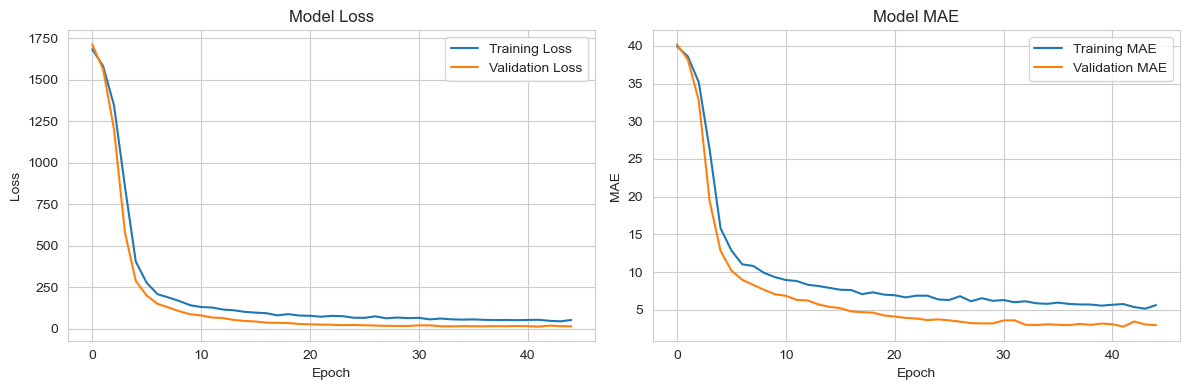

In [132]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=45, validation_data=(x_test, y_test), batch_size=32)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [137]:
# 새로운 데이터 예측
new_student = np.array([[0.75217,7.3,6.2,79.0]])
new_student_scaled = scaler.transform(new_student)  # 스케일링 적용
prediction = model.predict(new_student_scaled)
print(f"예측 성적: {prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
예측 성적: 50.90
